In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd


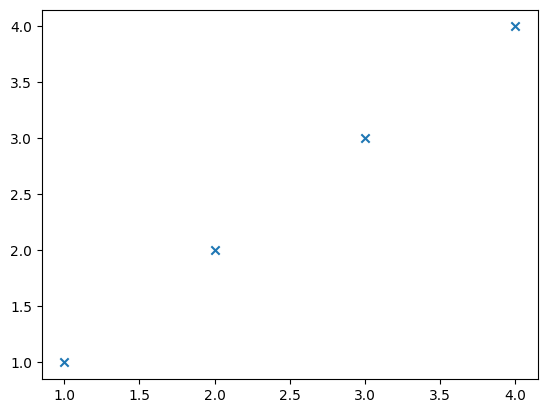

In [2]:
ax = range(1, 5)
ay = range(1, 5)

plt.scatter(
    ax,
    ay,
    marker="x",
)

plt.show()

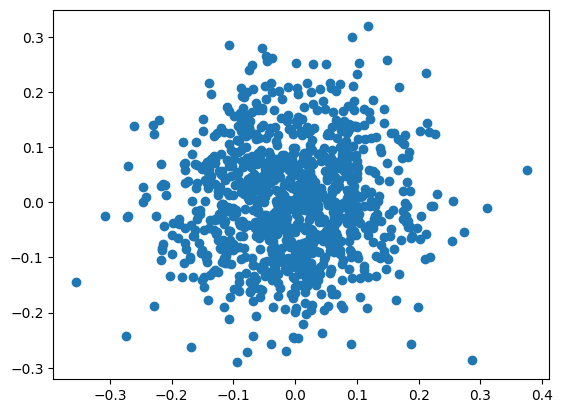

In [3]:
rgen = np.random.default_rng(1)
gaussx = rgen.normal(0, 0.1, (1000))
gaussy = rgen.normal(0, 0.1, (1000))

plt.scatter(gaussx, gaussy)
plt.show()

In [4]:
a = np.array(
    [
        [1, 2, 2],
        [3, 4, 1],
    ]
)
b = np.array([0.5, 0.1, 0.3])

print(a.shape, b.shape)
print(np.dot(a,b))
print(np.matmul(a,b))

(2, 3) (3,)
[1.3 2.2]
[1.3 2.2]


In [5]:
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.default_rng(self.random_state)
        self.w_ = rgen.normal(
            loc=0.0,
            scale=0.01,
            size=X.shape[1],
        )
        self.b_ = np.float64(0.0)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(
    url,
    header=None,
    encoding="utf-8",
)
print(df)


       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


TODO:
- Что если $w\_$ будет $np.zeros$?


50
[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.5 4

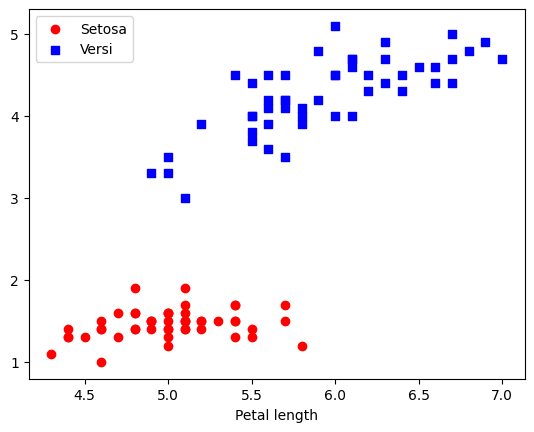

In [6]:
y = df.iloc[0:100, 4].to_numpy()
y = np.where(y == "Iris-setosa", 0, 1)
print(list(y).index(1))

X = df.iloc[0:100, [0, 2]].to_numpy()
print(X)

plt.scatter(
    X[:50, 0],
    X[:50, 1],
    color="red",
    marker="o",
    label="Setosa",
)

plt.scatter(
    X[50:100, 0],
    X[50:100, 1],
    color="blue",
    marker="s",
    label="Versi",
)
plt.xlabel("Sepal length")
plt.xlabel("Petal length")
plt.legend(loc="upper left")
plt.show()


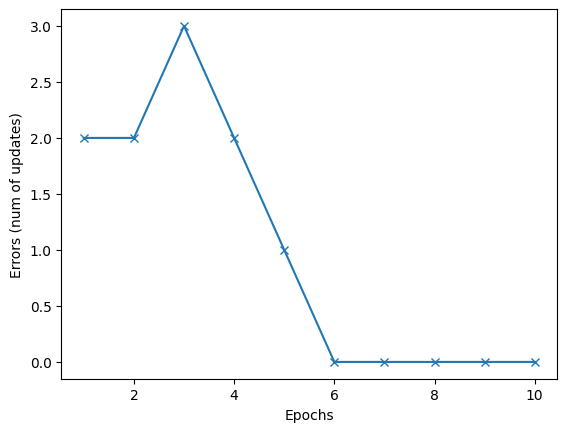

[1.2998882  2.42323225]


In [7]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(
    range(1, len(ppn.errors_) + 1),
    ppn.errors_,
    marker="x",
)
plt.xlabel("Epochs")
plt.ylabel("Errors (num of updates)")
plt.show()

what = ppn.net_input(
    np.array(
        [
            [1, 2],
            [3, 4],
        ]
    )
)
print(what)
# 62

[0 0 0 ... 1 1 1]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


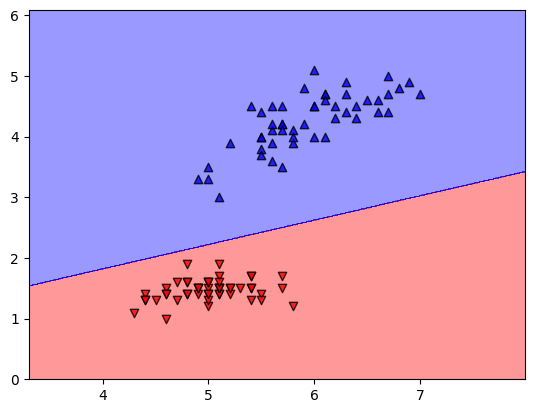

In [8]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.01):
    markers = ("v", "^", "s", "o", "<")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[: len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution),
    )

    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).transpose())
    print(lab)
    lab = lab.reshape(xx1.shape)
    print(lab)

    plt.contourf(xx1, xx2, lab, alpha=0.4, cmap=cmap)
    
    # TODO: why even to this?
    # plt.xlim(x1_min, x1_max)
    # plt.ylim(x2_min, x2_max)

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label="Class {}".format(cl),
            edgecolors="black",
        )

plot_decision_regions(X, y, classifier=ppn)
plt.show()
